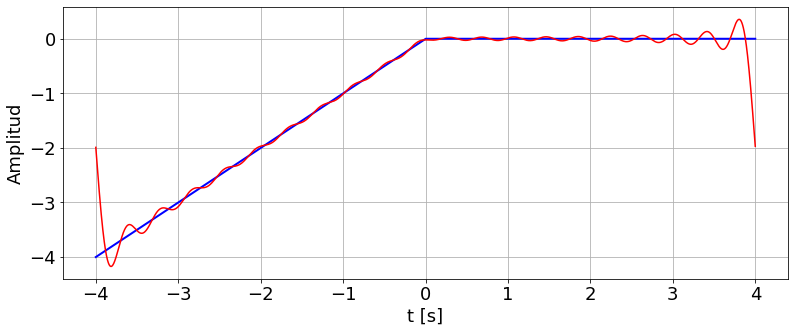

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from IPython.display import  Math
plt.rcParams['figure.figsize'] = [13, 5]
plt.rcParams.update({'font.size': 18})

##### Defino parámetros
tau=4
k=1
#####
dt = 0.001 # Resolución del eje x
n_coef=20# cantidad de coeficientes de Serie De Fourier a calcular
#####
T = 2*tau# Periodo de la función
t =  np.arange(-1*tau,tau,dt) # arreglo de espacio de tiempo 
muestras=len(t)
omega=2*np.pi/T
##### Defino la función
x =k*t # igualo a -1 el intervalo de t  [-2,0)
x[len(x)//2:-1]=0
x[-1]=0
#####

fig, ax1 = plt.subplots()
ax1.plot(t,x,'-',color='b',LineWidth=2)

# Calculo los parámetros de la Serie de Fourier 
c_0 =(1/T)* np.sum(x*dt)  # 

xFS=c_0
c = np.zeros(n_coef,dtype=complex) # Inicializo los coeficientes que escalan los cosenos

for n in range(n_coef): #
    c[n] = (1/T)* np.sum( x * np.exp( -1j * (n+1) * omega * t) * dt) 
    xFS = np.real(xFS + c[n] * np.exp(1j*(n+1)*(omega)*t) + np.conjugate(c[n]) * np.exp(-1j*(n+1)*(omega)*t) )
ax1.plot(t,xFS,'-r')
ax1.set_xlabel('t [s]')
ax1.set_ylabel('Amplitud')
ax1.grid()

c_neg=np.flip(np.conjugate(c))
c=np.concatenate(([c_0,],c))
c=np.concatenate((c_neg,c))



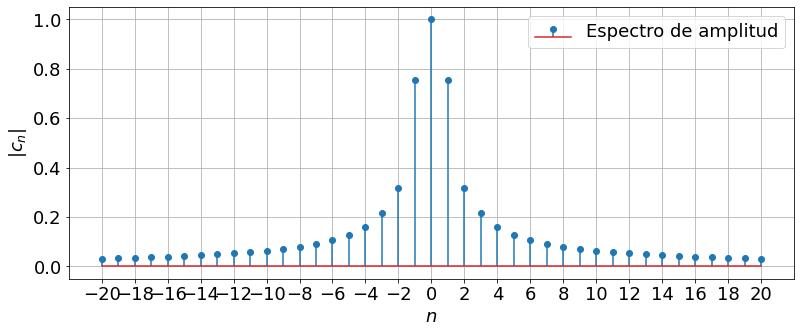

In [ ]:
fig2,ax3 = plt.subplots()
ax3.stem(range(-1*n_coef,n_coef+1,1),abs(c), use_line_collection=True)
ax3.legend(['Espectro de amplitud'])
ax3.set_ylabel('$|c_n|$')
ax3.set_xticks(range(-1*n_coef,n_coef+1,2))
ax3.set_xlabel('$n$')
ax3.grid()

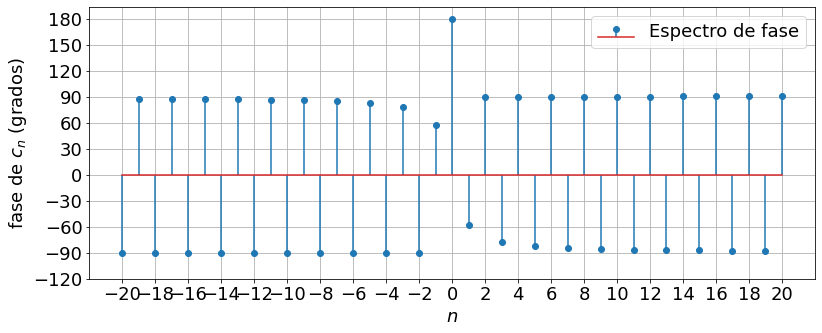

In [ ]:
fig3,ax4 = plt.subplots()

# c.real[np.logical_and(np.array(c.real < -0.0002, dtype=bool) , np.array(c.real>-0.9, dtype=bool))] = 0.0 # Esto lo usé para el caso de que la parte real debería dar cero pero daba un número muy chico
ax4.stem(range(-1*n_coef,n_coef+1,1),np.angle(c,deg=False)*180/np.pi, use_line_collection=True)
ax4.legend(['Espectro de fase'])
ax4.set_ylabel('fase de $c_n$ (grados)')
ax4.set_xticks(range(-1*n_coef,n_coef+1,2))
ax4.set_yticks(range(-120,210,30))
ax4.set_xlabel('$n$')
ax4.grid()

(-0.00024999999999986535-0.031830334117221526j) -20 (-0.00024999999999986535+0.031830334117221526j) 20 (0.016461410216125176-0.12732379084887085j) 5


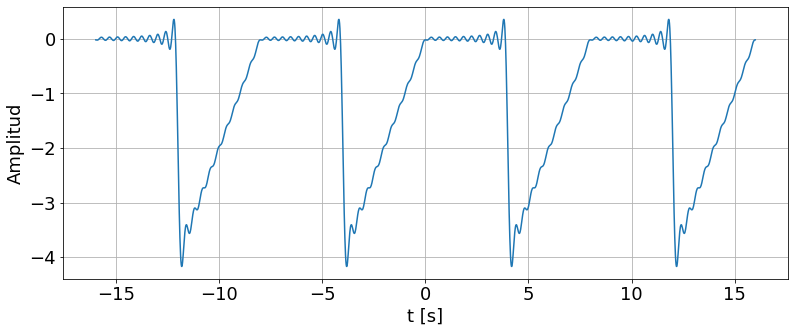

In [ ]:
T2=4*T
dt2=0.01
t2 = (T2/2) * np.arange(-1+dt,1+dt,dt) # arreglo de espacio de tiempo 
xFS2=np.array([0 for _ in t2])
k=np.arange(-1*n_coef,n_coef+1,1)
for n in  range(0,2*n_coef+1): 
  xFS2 = xFS2 + c[n]* np.exp(1j*(k[n])*(omega)*t2) 

fig3, ax5 = plt.subplots()
ax5.plot(t2,(np.real(xFS2)))
ax5.grid()
ax5.set_xlabel('t [s]')

_=ax5.set_ylabel('Amplitud')


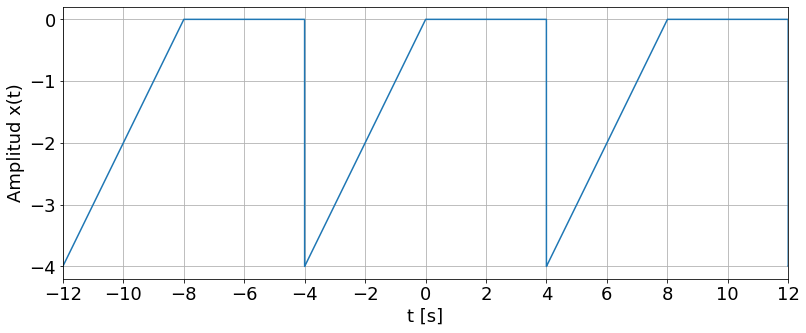

In [ ]:
x2=np.concatenate((x,x,x,x))
fig4, ax6 = plt.subplots()

plt.plot(np.arange(-3*tau,5*tau,dt), x2 )
plt.xlim([-12,12])
ax6.grid()
ax6.set_xlabel('t [s]')
ax6.set_ylabel('Amplitud x(t)')

ax6.set_xticks(range(-12,13,2))
ax6